In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
import numpy as np
from skopt import gp_minimize

def f(x):
    return x[0]**2
#     return (np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) *
#             np.random.randn() * 0.1)

res = gp_minimize(f, [(-2.0, 2.0)], n_random_starts=5, n_calls=10)

In [95]:
res

          fun: 4.6581775272402499e-07
    func_vals: array([  2.33981743e-01,   1.69139829e+00,   6.38596038e-02,
         4.25190345e-01,   1.18762741e+00,   4.00000000e+00,
         2.75862932e-02,   4.57380231e-03,   3.24507210e-04,
         4.65817753e-07])
       models: [GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b',
             random_state=<mtrand.RandomState object at 0x10ab97e10>), GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b',
             random_state=<mtrand.RandomState object at 0x10ab764b0>), GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
             

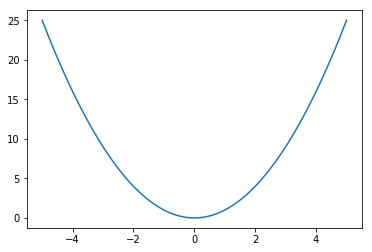

In [115]:
x = np.linspace(-5,5,100).reshape(1,-1,1)
y = f(x)
plt.plot(x.ravel(),y.ravel())

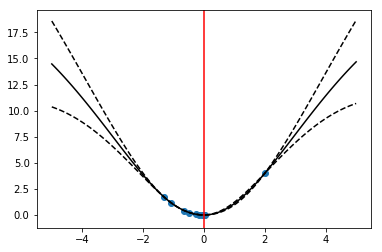

In [128]:
prd,std = res.models[-1].predict(x[0], return_std = True)

plt.plot(x[0],prd,linestyle = 'solid', c = 'k')
plt.plot(x[0],prd+std,linestyle = 'dashed', c= 'k')
plt.plot(x[0],prd-std,linestyle = 'dashed', c= 'k')
plt.scatter(res.x_iters,res.func_vals, marker = 'o')
plt.axvline(res.x[0],color = 'r')